# Part II - Loan Data Exploration
## by Kenechukwu Ifediorah




## Investigation Overview


 - For this presentation. I will be explaining the relationship between the income range of borrowers and the loan amount
 - I will also elaborate on the influence of credit rating on Loan amount
 - I'll also explain the relationship between Employment status and Loan status



## Dataset Overview

- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
- This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.
- The dataset has 113,937 loan entries with the features (LoanStatus, BorrowerAPR, BorrowerRate, EstimatedReturn, Term, ListingCategory, LoanOriginalAmount, etc)
- There is also Borrower data with features like (Occupation, EmploymentStatus, BorrowerState, StatedMonthlyIncome, etc)
- There are 81 columns in the dataset which means there are a lot of features to explore

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
#Change `ProsperScore` to string and range 1-11 to become 0-10
loan['ProsperScore'] = loan['ProsperScore'].fillna(-1).astype(int).astype(str)
loan['ProsperScore'] = loan['ProsperScore'].apply(lambda x: str(int(x)-1))
loan['ProsperScore'] = loan['ProsperScore'].replace('-2', np.nan)

# Change ProsperScore and IncomeRange to ordered categorical data
ordinal_dict = {'ProsperScore': ['0','1','2','3','4','5','6','7','8','9','10'],
                    'IncomeRange': ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_dict[var])
    loan[var] = loan[var].astype(ordered_var)
    

In [4]:
#Convert ListingCategory from numerical data to Categorical
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].replace(
                                                                    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                                                    ['Not Available','Debt Consolidation','Home Improvement','Business',
                                                                     'Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat',
                                                                     'Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses',
                                                                     'Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation',
                                                                     'Wedding Loans'])


#Rename the column
loan.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [5]:
# Since CreditRating for pre-2009 dlistings are stored in the `CreditGrade` column and 
# that for post-2009 listings are stored in the `ProsperRating (Alpha)` column, 
# I'll rght a function to merge this two columns

# Function to merge columns
def cred(row):
    if pd.notna(row['ProsperRating (Alpha)']):
        return row['ProsperRating (Alpha)']
    if pd.notna(row['CreditGrade']):
        return row['CreditGrade']
    else: return np.nan

loan['CreditRating'] = loan.apply(lambda x: cred(x), axis=1)


# Now convert the credit rating to ordered categorical data
dict = {'CreditRating': ['AA','A','B','C','D','E','HR','NC']}

for var in dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = dict[var])
    loan[var] = loan[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Employment Status vs Loan Status

After initial separate exploration of the distribution between Loan Status and Employment status, I noticed that majority of borrowers had a stable source of income and that most of the loans were either current, completed, charged off or defaulted.

Which is why I decided to juxtapose both features to see if there is a relationship between the employment status of the borrower and the loan status.

The heatmap below revealed that about 50,000 loans (nearly 50% of total listings) are current and taken by employed borrowers. In fact, the majority of the data lie with the employed and full time borrowers. Most of these loans were either current or completed. This would initially suggest that these class of borrowers always pay back the loans.

However, we could also see that majority of the charged off and defaulted loans also fall among this class of borrowers. 

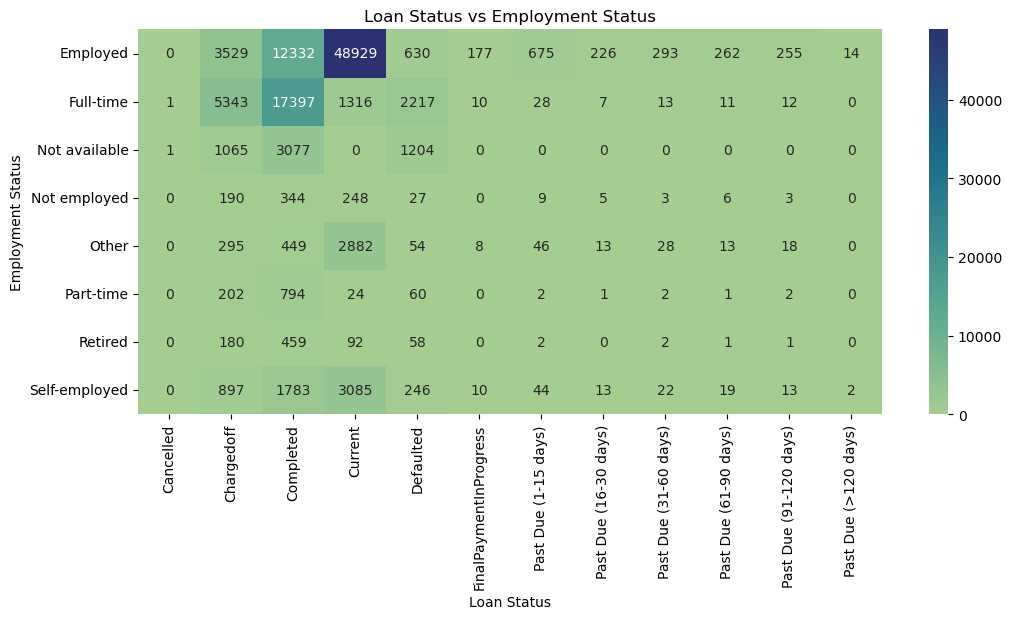

In [6]:
plt.figure(figsize = [12, 5])
count_table = pd.crosstab(loan['EmploymentStatus'], loan['LoanStatus'])
count_table.sort_index(level=0, ascending=True, inplace=True)
sb.heatmap(count_table, annot=True, fmt='d',cmap='crest')
plt.ylabel('Employment Status')
plt.xlabel('Loan Status')
plt.title('Loan Status vs Employment Status')
plt.show();

## Loan Amount by Income range

Now, I wanted to see if the Income range of borrowers had any influence on the loan amount taken. Now before this, I had ascertained the distribution of the loan amount by plotting a histogram. I found that majority of the loans taken were between 0-20000 USD. However, there were some outliers in the 30,000-35,000 range. Hence the further investigation.

After plotting a violinplot, We can see that this further explains the data we had earlier around the 35000 area. We see that people who earn over 100,000 USD are those that borrowed this much money. We can see that borrowers with higher income have a tendency to borrow higher amounts but also borrow less.

Furthermore, we can see that people that earn between 0-5,000 borrow more often even though they tend to borrow lesser amounts.

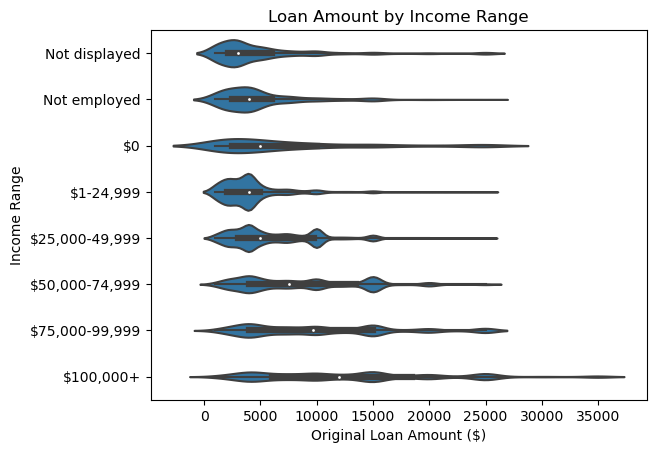

In [7]:
sb.violinplot(data=loan, y='IncomeRange', x='LoanOriginalAmount', color=sb.color_palette()[0]);
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Income Range');
plt.title('Loan Amount by Income Range');

## Loan Amount by Credit rating

Now I knew how the income range affected loan amount, I wanted to find out credit rating affected the same loan amount.

- Credit rating has been ordered from 'AA' being the Highest to 'NC' being the lowest
- I used a Faceted histogram grid to plot the distribution of loan amount for every category of credit rating

We can see from the plot that as the credit rating reduces, there is a corresponding decrease in the loan amount.

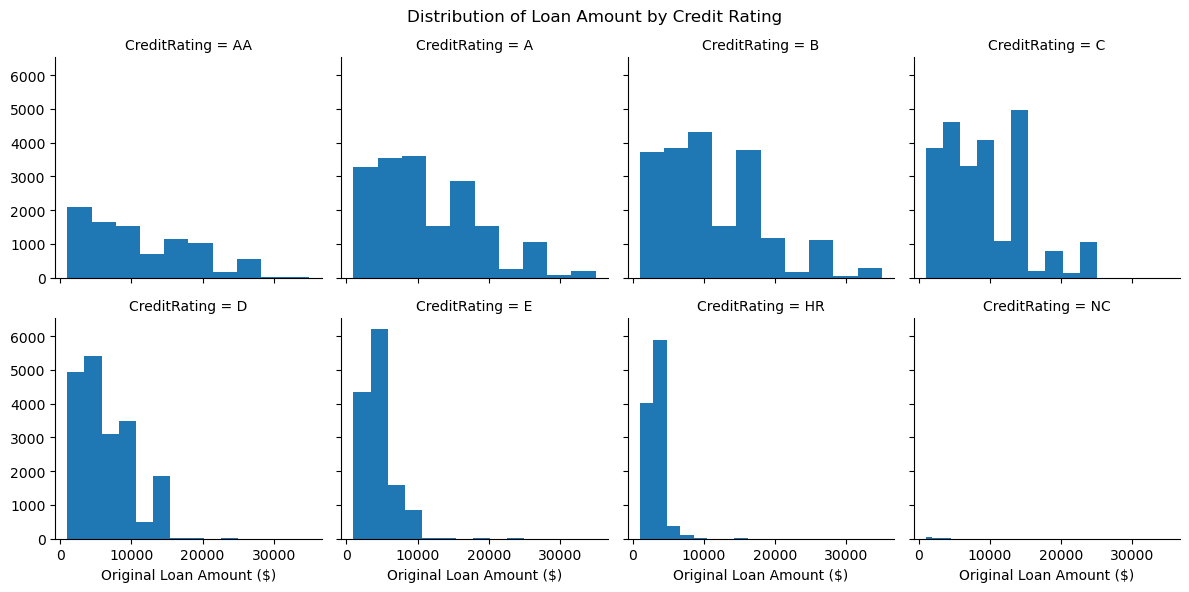

In [12]:
# plot the distribution of original loan amount for every credit rating.
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = loan, col = 'CreditRating', col_wrap=4, sharey=True, margin_titles=False)
g.map(plt.hist, "LoanOriginalAmount")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Loan Amount by Credit Rating')
g.set_axis_labels('Original Loan Amount ($)')
plt.ylabel('Credit Rating');
plt.show();

In [ ]:
!jupyter nbconvert <Part_II_loan_data_exploration>.ipynb --to slides --post serve --no-input --no-prompt